In [84]:
import pandas as pd
df = pd.read_csv(r"E:\PES\SEM2\Refer\ML\ML_Datasets-20230613T052137Z-001\ML_Datasets\loan_data.csv")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      1428 non-null   int64  
 1   purpose            1428 non-null   object 
 2   int.rate           1428 non-null   float64
 3   installment        1428 non-null   float64
 4   log.annual.inc     1428 non-null   float64
 5   dti                1428 non-null   float64
 6   fico               1428 non-null   int64  
 7   days.with.cr.line  1428 non-null   float64
 8   revol.bal          1428 non-null   int64  
 9   revol.util         1428 non-null   float64
 10  inq.last.6mths     1428 non-null   int64  
 11  delinq.2yrs        1428 non-null   int64  
 12  pub.rec            1428 non-null   int64  
 13  not.fully.paid     1428 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 156.3+ KB


In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()

In [88]:
df['purpose'] = le.fit_transform(df['purpose'])

In [89]:
df['purpose']

0       2
1       1
2       2
3       2
4       1
       ..
1423    0
1424    6
1425    5
1426    6
1427    1
Name: purpose, Length: 1428, dtype: int32

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
MM = MinMaxScaler()

In [92]:
df[['installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']] = MM.fit_transform(df[['installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']])

In [93]:
df.describe

<bound method NDFrame.describe of       credit.policy  purpose  int.rate  installment  log.annual.inc       dti  \
0                 1        2    0.1189     0.924466        0.471325  0.662135   
1                 1        1    0.1071     0.241547        0.426698  0.485724   
2                 1        2    0.1357     0.399116        0.308809  0.395309   
3                 1        2    0.1008     0.166672        0.471325  0.275323   
4                 1        1    0.1426     0.099140        0.462895  0.508838   
...             ...      ...       ...          ...             ...       ...   
1423              1        0    0.1146     0.206917        0.644002  0.123725   
1424              1        6    0.1146     0.356735        0.395855  0.737254   
1425              1        5    0.1209     0.357314        0.487181  0.439157   
1426              1        6    0.1462     0.569982        0.511165  0.392930   
1427              1        1    0.0938     0.200234        0.365524  0.3633

In [94]:
X = x=df[['purpose','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']]

In [95]:
Y = y=df['not.fully.paid']

In [96]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
acc_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    acc_rate.append(score.mean())

Text(0, 0.5, 'Accuarcy Rate')

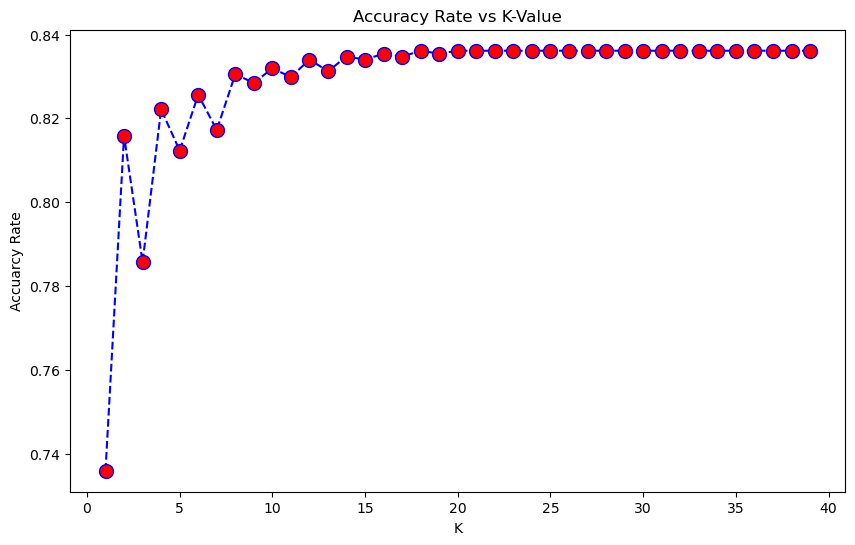

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Accuarcy Rate')

Text(0, 0.5, 'Error Rate')

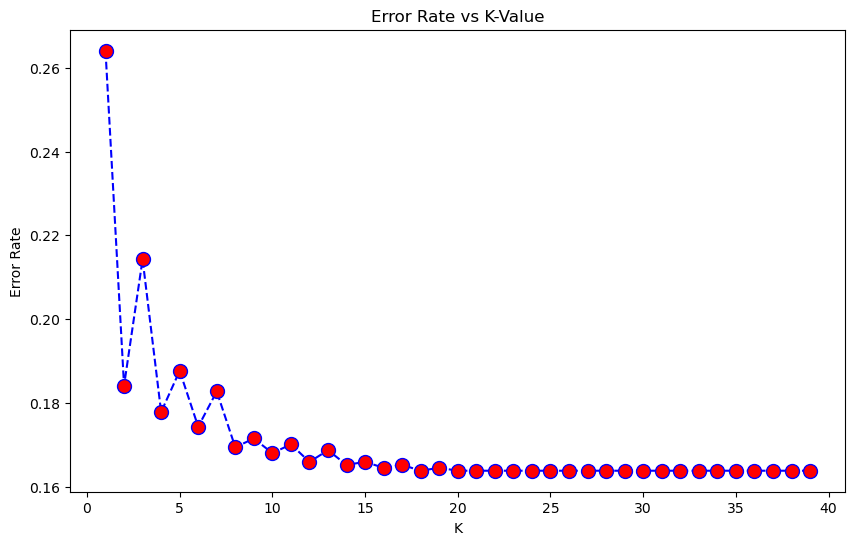

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    error_rate.append(1-score.mean())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25,p=2)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=25)

In [100]:
ypred=knn.predict(xtest)

In [101]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(ytest,ypred))

0.8636363636363636


In [102]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

In [103]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
ypred= nb.predict(xtest)

In [104]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [105]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(ytest,ypred))

0.7867132867132867


Text(0, 0.5, 'Accuracy Rate')

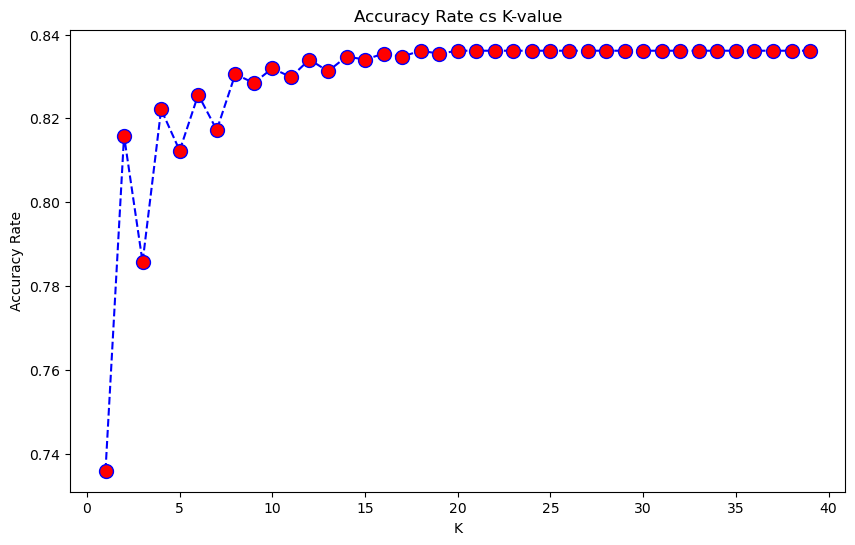

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.title("Accuracy Rate cs K-value")
plt.xlabel("K")
plt.ylabel("Accuracy Rate")